# Titanic Machine Learning

## Predict the survivability of each passenger
Given a training and a test set, output a csv file of this format: (Exactly one header)

In [40]:
#PassengerId,Survived
# 892,0
# 893,1
# 894,0
# Etc.

In [41]:
!pip install seaborn

In [42]:
from io import StringIO  
import requests  
import json  
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#Allow chained assignment
pd.options.mode.chained_assignment = None

#Configure
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
plt.rcParams[ 'figure.figsize' ] = 8 , 6

def get_data(credentials):  
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

### First insert all credentials for the csv files so that we may use it to plot and manipulate the data

In [43]:
# The code was removed by DSX for sharing.

In [44]:
dummy = df = pd.read_csv(get_data(credentials_1), index_col=0)
#df = pd.read_csv(get_data(credentials_1))
df.head()
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S


In [45]:
final_test = pd.read_csv(get_data(credentials_2), index_col=0)
final_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
print df.shape
print final_test.shape
PassengerId = range(1,892)

(891, 11)
(418, 10)


In [47]:
# Machine Learning Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

### Feature Engineering Attempt
Try to make sense of the given dataset, include/exclude useful/useless info, and fill in slots that have no info with our own. Vice versa is true as well. For example, out of 891 entries, 687 Cabin slots are NaN, so is it better to come up with 687 entries on our own or rather exclude the remaining 204 slots with actual value? These are the the things we need to consider for each factor.

First, we will start off by grabbing as much 'relevant' info as possible and make sense of them.

In [48]:
print 'Total # of passengers:', df.size / df.columns.size
print '# of unique tickets:', df.Ticket.unique().size
print '# of missing tickets:', df.Ticket.isnull().sum()
print '# of missing Cabin:', df['Cabin'].isnull().sum()
print '\nMale {} | Female {}'.format(df.Sex.value_counts().male, df.Sex.value_counts().female)

#Calculate male survivability vs female survivability
gender_survive = df[df['Survived']==1]
gender_survive_count = gender_survive.Sex.value_counts()

print 'Male Survive {}/{} | Female Survive {}/{}\n'.format(
        gender_survive_count.male, (df['Sex']=='male').sum(),
        gender_survive_count.female, (df['Sex']=='female').sum())
print 'Male Survivability: %.2f%% | Female Survivability: %.2f%%' % (
        gender_survive_count.male / float((df['Sex']=='male').sum()) *100,
        gender_survive_count.female / float((df['Sex']=='female').sum()) * 100)
print 'Mean age:', df['Age'].mean()
print 'Mean Fare price:', df.Fare.mean()
print '\nSurvived {} | Dead {}'.format(df.Survived.value_counts().get(1), 
                                     df.Survived.value_counts().get(0))

Total # of passengers: 891
# of unique tickets: 681
# of missing tickets: 0
# of missing Cabin: 687

Male 577 | Female 314
Male Survive 109/577 | Female Survive 233/314

Male Survivability: 18.89% | Female Survivability: 74.20%
Mean age: 29.6991176471
Mean Fare price: 32.2042079686

Survived 342 | Dead 549


In [49]:
print final_test.Embarked.loc[899]
print final_test.Embarked.size

S
418


In [50]:
C = 0
S =0
Q=0
NA=0
df_copy = df.copy()

#Here we will count up the number of S, C, and Q's, but also convert them into
#Numerical value so that we can use it to plot it in.
#loc looks for labels, whereas iloc looks for the index number
#I will also change the final_test dataset's characters into nums.
for i in range(df.Embarked.size):
    char = df.Embarked.iloc[i]
    if char == 'S':
        S+=1
        num = 0
    elif char == 'C':
        C+=1
        num = 1
    elif char == 'Q':
        Q+=1
        num = 2
    else:
        NA+=1
        num = 3
    df_copy.set_value(col='Embarked', index=i+1, value=num)
    
#final_test dataset
for j in range(final_test.Embarked.size):
    char = final_test.Embarked.iloc[j]
    if char == 'S':
        num = 0
    elif char == 'C':
        num = 1
    elif char == 'Q':
        num = 2
    else:
        num = 3
    #print 'j:', j+891, ' / char:', char, ' / num:', num
    final_test.set_value(col='Embarked', index=892+j, value=num)
print 'Southampton:', S,' Cherbourg:',C, ' Queenstown:', Q, ' N/A:', NA
print df_copy.Embarked.tail(), '', df.Embarked.tail()

Southampton: 644  Cherbourg: 168  Queenstown: 77  N/A: 2
PassengerId
887    0
888    0
889    0
890    1
891    2
Name: Embarked, dtype: object  PassengerId
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, dtype: object


In [51]:
index_zero = []
for i in range(df.Fare.size):
    if df.Fare.iloc[i] == 0:
        index_zero.append(i)
print 'Number of people that paid $0 as Fare: {}'.format(len(index_zero))
print 'They all happen to be males as well.'
print 'Out of {} people, only {} survived. Possibly strong correlation?\n'.format(
       len(index_zero), df.iloc[index_zero].Survived.value_counts().get(1))
df.iloc[index_zero]

Number of people that paid $0 as Fare: 15
They all happen to be males as well.
Out of 15 people, only 1 survived. Possibly strong correlation?



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,NaN,S
264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0,NaN,S


In [52]:
#a stores all passengers with one or more siblings and/or spouses
a= df[df['SibSp'] > 0]
print '# of passengers with 1+ sib/sp:', a.size / a.columns.size 
a.head()


# of passengers with 1+ sib/sp: 283


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [53]:
#Delete unnecessary columns (such as Ticket / Name) or convert strings into meaningful number (ie. Sex)
df_copy.drop('Sex', axis=1, inplace=True)
#Note that once the code has been executed, the columns are gone and can not be reverted.
df_copy.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,NaN,0


In [54]:
#You can use get_dummies method in pandas in order to automatically convert females/males into 0's/1's
b = pd.get_dummies(df['Sex'])
df_copy['Sex'] = pd.Series(b['male'])
df_copy.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,NaN,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,1,0
3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,NaN,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,0,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,NaN,0,1


In [55]:
df_copy.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [56]:
df_copy.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
PassengerId,,,,,,,,
1,0,3,22,1,0,7.2500,0,1
2,1,1,38,1,0,71.2833,1,0
3,1,3,26,0,0,7.9250,0,0
4,1,1,35,1,0,53.1000,0,0
5,0,3,35,0,0,8.0500,0,1


In [57]:
#Perhaps people with sib/spouses/parents have a higher survivability. We will check
not_alone = ((df_copy['SibSp'] + df_copy['Parch']) > 0).astype(int)
df_copy['Not Alone'] = pd.Series(not_alone)
aa1 = df_copy[(df_copy['Survived']==1) & (df_copy['Not Alone']==1)]
print 'Among {} people that survived, {} people had at least one person with them onboard.'.format(
        df_copy.Survived.sum(), aa1.Survived.sum())
df_copy.drop(['SibSp', 'Parch'], inplace=True, axis=1)

Among 342 people that survived, 179 people had at least one person with them onboard.


In [58]:
df_copy.head()

,Survived,Pclass,Age,Fare,Embarked,Sex,Not Alone
PassengerId,,,,,,,
1,0,3,22,7.2500,0,1,1
2,1,1,38,71.2833,1,0,1
3,1,3,26,7.9250,0,0,0
4,1,1,35,53.1000,0,0,1
5,0,3,35,8.0500,0,1,0


In [59]:
#df.head()

In [60]:
#Set all the NaN values in Age to its mean value so you can plot it in.
df_copy['Age'] = df_copy['Age'].fillna(df['Age'].mean())
df_copy.head()

,Survived,Pclass,Age,Fare,Embarked,Sex,Not Alone
PassengerId,,,,,,,
1,0,3,22,7.2500,0,1,1
2,1,1,38,71.2833,1,0,1
3,1,3,26,7.9250,0,0,0
4,1,1,35,53.1000,0,0,1
5,0,3,35,8.0500,0,1,0


### At this point df_copy is ready to be trained into model. Choosing the best model will be a challenge.

In [61]:
#I will do the same thing I did to df_copy into the final_test dataset such as converting Sex into a numerical value, etc
#NA Age conversion
final_test['Age'].fillna(final_test['Age'].mean(), inplace=True)
final_test['Fare'].fillna(final_test['Fare'].mean(), inplace=True)

not_alone = ((final_test['SibSp'] + final_test['Parch']) > 0).astype(int)
final_test['Not Alone'] = pd.Series(not_alone)
final_test.drop(['SibSp', 'Parch'], inplace=True, axis=1)

#df_copy['Age'].fillna(final_test['Age'].mean(), inplace=True)
#df_copy['Fare'].fillna(final_test['Fare'].mean(), inplace=True)

s = pd.get_dummies(final_test['Sex'])
final_test.drop('Sex', inplace=True, axis=1)
final_test['Sex'] = pd.Series(s['male'])
final_test.head()

,Pclass,Name,Age,Ticket,Fare,Cabin,Embarked,Not Alone,Sex
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",34.5,330911,7.8292,NaN,2,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,NaN,0,1,0
894,2,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,NaN,2,0,1
895,3,"Wirz, Mr. Albert",27.0,315154,8.6625,NaN,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,NaN,0,1,0


In [62]:
#Drop useless(?) columns in final dataset
final_test.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
final_test.tail()

,Pclass,Age,Fare,Embarked,Not Alone,Sex
PassengerId,,,,,,
1305,3,30.27259,8.0500,0,0,1
1306,1,39.00000,108.9000,1,0,0
1307,3,38.50000,7.2500,0,0,1
1308,3,30.27259,8.0500,0,0,1
1309,3,30.27259,22.3583,1,1,1


In [63]:
#Make sure there is no null cells in final_test dataset
final_test.isnull().sum()

Pclass       0
Age          0
Fare         0
Embarked     0
Not Alone    0
Sex          0
dtype: int64

In [64]:
#final_cols = ['Pclass', 'Sex,', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [65]:
#try plotting all the default values with numerical value
#Edit1: Got rid of 'SibSp' and 'Parch', added in 'Not Alone'
feature_cols = ['Pclass', 'Sex', 'Age', 'Not Alone',
                'Fare', 'Embarked']
x = df_copy[feature_cols]
y = df_copy['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print x.shape
print y.shape

#first try Logistic Regression
logreg = RandomForestClassifier()
logreg.fit(x, y)

(891, 6)
(891,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
u = logreg.fit(x, y)
p =logreg.predict(final_test)
p.sum()

33

In [67]:
#Make a prediction
y_pred = logreg.predict(x_test)
#compare accuracy
print 'logreg accuracy score with 75/25 split:', metrics.accuracy_score(y_pred, y_test)

logreg accuracy score with 75/25 split: 0.973094170404


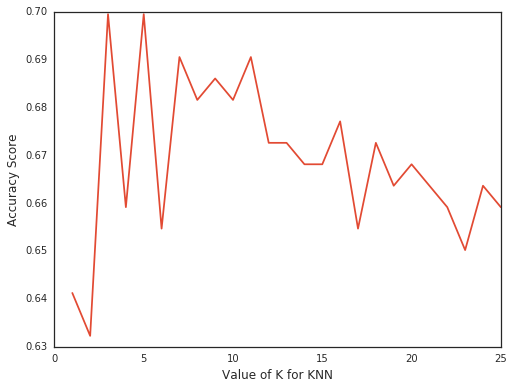

In [68]:
#Try knn
#find best k
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    k_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(k_pred, y_test))

#Visualize by plotting
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel("Accuracy Score")
#k=3 seems to return the best result

In [80]:
#Use knn=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
k_pred = knn.predict(x_test)
print 'knn accuracy with n_neighbors=3:', metrics.accuracy_score(k_pred, y_test)


knn accuracy with n_neighbors=3: 0.699551569507


In [70]:
#try Linear regression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
zip(feature_cols, linreg.coef_)

[('Pclass', -0.19953710192956176),
 ('Sex', -0.48221979525074576),
 ('Age', -0.0059937176258563346),
 ('Not Alone', 0.0049200796727064487),
 ('Fare', -0.00019567348742993707),
 ('Embarked', 0.054580935500780241)]

In [72]:
lin_pred = linreg.predict(x_test)
print metrics.mean_absolute_error(y_test, lin_pred)
print metrics.mean_squared_error(y_test, lin_pred)
print np.sqrt(metrics.mean_squared_error(y_test, lin_pred))

0.303404512065
0.1554145353
0.394226502534


In [73]:
#Make the final result into a csv with the proper specifications
knn.fit(x,y)
p1 = knn.predict(final_test)
p1

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0,

In [74]:
def put_file(credentials, local_file_name):  
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""
    f = open(local_file_name,'r')
    my_data = f.read()
    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', credentials['container'], '/', local_file_name])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.put(url=url2, headers=headers2, data = my_data )
    print resp2

In [75]:
PId = range(892,1310)
ans = pd.DataFrame({'PassengerId':PId, 'Survived':p1})
print ans
ans.to_csv('minho_ans.csv', index=False)
put_file(credentials_3, 'minho_ans.csv')
print 'Done!'

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         0
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         0
13           905         0
14           906         0
15           907         0
16           908         0
17           909         1
18           910         0
19           911         1
20           912         0
21           913         1
22           914         0
23           915         0
24           916         0
25           917         0
26           918         0
27           919         1
28           920         0
29           921         0
..           ...       ...
388         1280         1
389         1281         0
390         1282         0
391         1283         0
392         1284         0
3